### Is there a difference in gas prices for each year?
    - Quantify the difference

### Has my driving gotten more fuel efficient?
    - How much?
    - How much money did this save?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

In [2]:
#read in the data
df = pd.read_csv('data/Gas')
df.head()

,Date,Cost,Gal,Mile
0,06/16/17,$10.37,4.052,83.4
1,06/19/17,$15.29,7.426,194.7
2,07/14/17,$21.21,10.567,274.8
3,7/24/17,$24.53,12.269,254.1
4,8/18/17,$19.42,9.081,163.3


In [3]:
#cost needs to be a float
df['Cost'] = df['Cost'].str.replace('$','')
df['Cost'] = df['Cost'].map(lambda x: float(x))

In [4]:
#make price per gal column and mile per gal column
df['Price_per_Gallon'] = df['Cost'] / df['Gal']
df['Mile_per_Gallon'] = df['Mile'] / df['Gal']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              91 non-null     object 
 1   Cost              91 non-null     float64
 2   Gal               91 non-null     float64
 3   Mile              91 non-null     float64
 4   Price_per_Gallon  91 non-null     float64
 5   Mile_per_Gallon   91 non-null     float64
dtypes: float64(5), object(1)
memory usage: 4.4+ KB


In [5]:
#make year column
df['Year'] = df['Date'].map(lambda x: x[-2:])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              91 non-null     object 
 1   Cost              91 non-null     float64
 2   Gal               91 non-null     float64
 3   Mile              91 non-null     float64
 4   Price_per_Gallon  91 non-null     float64
 5   Mile_per_Gallon   91 non-null     float64
 6   Year              91 non-null     object 
dtypes: float64(5), object(2)
memory usage: 5.1+ KB


In [6]:
#make year dfs
#2017
df_2017 = df.loc[df['Year'] == '17']
df_2017

df_2018 = df.loc[df['Year'] == '18']
df_2019 = df.loc[df['Year'] == '19']
df_2020 = df.loc[df['Year'] == '20']
df_2021 = df.loc[df['Year'] == '21']

In [7]:
year_frames = [df_2017,df_2018,df_2019,df_2020,df_2021]
yr = 2017

for year in year_frames:
    year.size
    print(f'The size of {yr} is {year.size}')
    yr +=1

The size of 2017 is 63
The size of 2018 is 203
The size of 2019 is 196
The size of 2020 is 140
The size of 2021 is 35


C:\Users\umbac\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\umbac\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


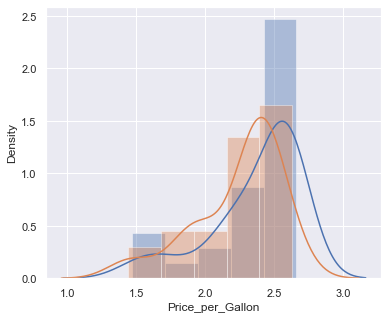

In [8]:
#im gonna compare 2018 and 2019 bc their sizes are similar
#first do a two sample t test
#alpha of 0.05
#null: The mean price per gallons are the same
#alt: The mean price per gallons are different

# Create a plot showing overlapping of distribution means and sds for inspection
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(6,5)})
sns.distplot(df_2018['Price_per_Gallon']) # Blue distribution
sns.distplot(df_2019['Price_per_Gallon']); # Green distribution



1) Set up null and alternative hypotheses

2) Choose a significance level

3) Calculate the test statistic (t-value)

4) Determine the critical t-value (find the rejection region)

5) Compare t-value with critical t-value to determine if we can reject the null hypothesis.

In [9]:
#find the means
#2018 will be the control
X_bar = np.mean(df_2018['Price_per_Gallon'])
x_bar = np.mean(df_2019['Price_per_Gallon'])
print(f'2018 mean is {X_bar}, 2019 mean is {x_bar}')

2018 mean is 2.367810216530317, 2019 mean is 2.2416892458759707


In [20]:
#This boundary identifies where significance is
#now we need to find the p value
#I need to make sure that the variances are the same
#this assumes they are the same
alpha = 0.05
result = stats.ttest_ind(df_2018['Price_per_Gallon'],df_2019['Price_per_Gallon'])
t = result[0]
p = result[1]

In [21]:
if p < alpha:
    print(f'The p value is less than the significance. Reject the null in favor of the alt')
else:
    print('The p value is greater than the significance. Fail to reject the null.')

The p value is greater than the significance. Fail to reject the null.


This says that there is no difference between the price per gallon of gas between 2018 and 2019

<AxesSubplot:ylabel='Price_per_Gallon'>

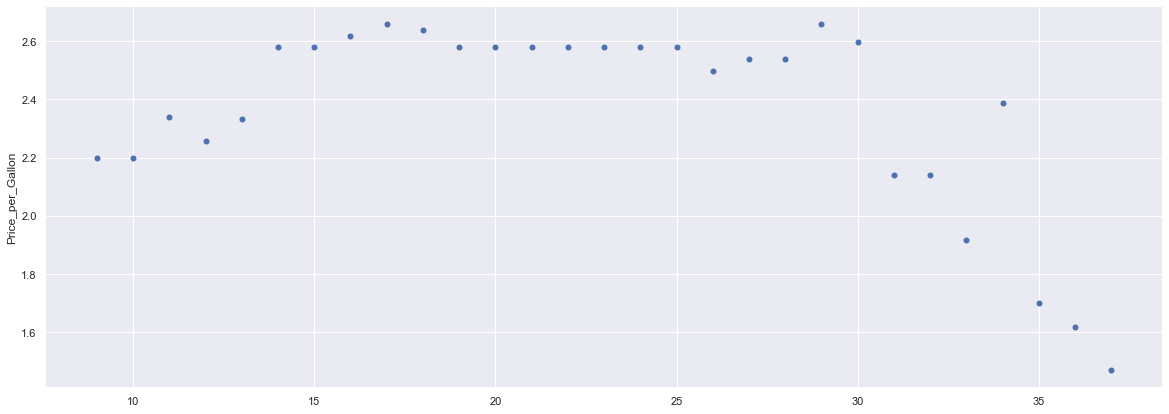

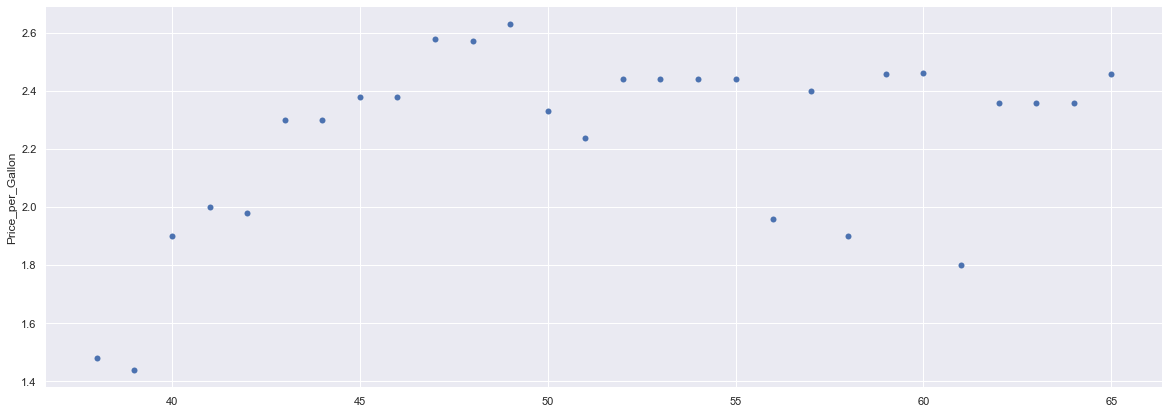

In [41]:
#lets plot the price over the whole year
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(20,7))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x=df_2018.index, y='Price_per_Gallon',
                palette="ch:r=-.2,d=.3_r",
                linewidth=0,
                data=df_2018, ax=ax)

#lets plot the price over the whole year
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(20,7))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x=df_2019.index, y='Price_per_Gallon',
                palette="ch:r=-.2,d=.3_r",
                linewidth=0,
                data=df_2019, ax=ax)